In [1]:
import collections
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats 

from scipy.optimize import leastsq

%matplotlib inline

## Load a sample Erdos-Renyi graph

degs= (19, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
[0.0025 0.005  0.01   0.0175 0.0325 0.035  0.0675 0.115  0.1225 0.0925
 0.1625 0.1275 0.105  0.0575 0.03   0.01   0.0075]
hist,sum= 1.0
(array([0.0175, 0.03  , 0.0575, 0.105 , 0.1275, 0.1625, 0.0925, 0.1225,
       0.115 , 0.0675, 0.035 , 0.0325, 0.0175, 0.01  , 0.005 , 0.    ,
       0.0025]), array([ 1.        ,  2.05882353,  3.11764706,  4.17647059,  5.23529412,
        6.29411765,  7.35294118,  8.41176471,  9.47058824, 10.52941176,
       11.58823529, 12.64705882, 13.70588235, 14.76470588, 15.82352941,
       16.88235294, 17.94117647, 19.        ]))
histo,sum= 1.0000000000000004


(array([0.0175, 0.03  , 0.0575, 0.105 , 0.1275, 0.1625, 0.0925, 0.1225,
        0.115 , 0.0675, 0.035 , 0.0325, 0.0175, 0.01  , 0.005 , 0.    ,
        0.0025]),
 array([ 1.        ,  2.05882353,  3.11764706,  4.17647059,  5.23529412,
         6.29411765,  7.35294118,  8.41176471,  9.47058824, 10.52941176,
        11.58823529, 12.64705882, 13.70588235, 14.76470588, 15.82352941,
        16.88235294, 17.94117647, 19.        ]),
 <a list of 17 Patch objects>)

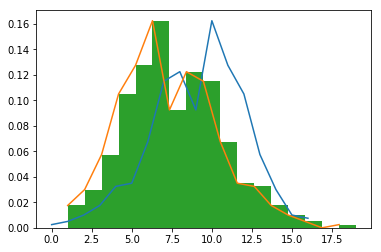

In [62]:
# Erdos-Renyi graph
G = nx.gnp_random_graph(400, 0.02, seed=455)

# Degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# Histogram vector
degreeCount = collections.Counter(degree_sequence)
degs, cnt = zip(*degreeCount.items())
print("degs=",degs)
hist = cnt / np.sum(cnt)
print(hist)
print("hist,sum=",sum(hist))
wgt=np.ones_like(degree_sequence)/float(400)
histo=np.histogram(degree_sequence, weights=wgt, bins=17)
print(histo)
print("histo,sum=",sum(histo[0]))
plt.plot(hist)
plt.plot(histo[1][:17],histo[0])
plt.hist(degree_sequence, weights=wgt, bins=17)

## Make a simple least-squares fit to the histogram

deg= 17
hist= 17


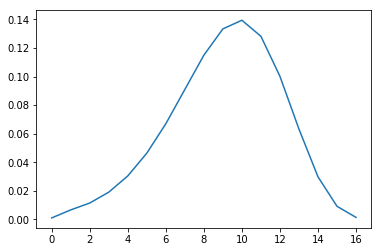

In [63]:
print("deg=", len(degs))
print("hist=", len(hist))

# We use a gamma pdf as the fit function due to its generality
fitfunc = lambda p, x: stats.gamma.pdf(x, p[0], p[1], p[2])
errfunc  = lambda p, x, y: np.abs(y - fitfunc(p, x))

# Initialization of the parameters
init = [2.0, 0.0, 1.0]

out   = leastsq( errfunc, init, args=(degs, hist))
c = out[0]

curve = fitfunc(c, degs)

plt.plot(curve)

/Users/AlexCionca/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


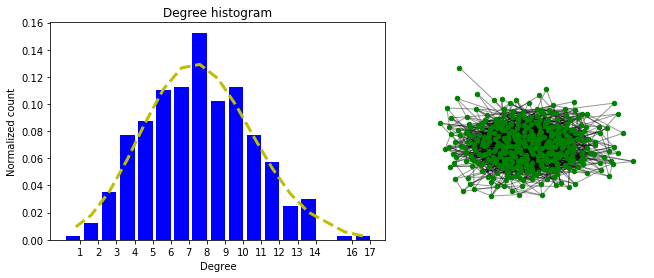

In [5]:
fig, ax = plt.subplots()
plt.bar(degs, hist, width=0.80, color='b')

plt.title("Degree histogram")
plt.ylabel("Normalized count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in degs])
ax.set_xticklabels(degs)

# overlay curve fit
plt.plot(degs, curve, '--y', linewidth=3)

# draw graph in inset
plt.axes([1.0, 0.25, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='g')
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [6]:
nzeros = np.sum(curve == 0)
print("Number of zeros on the curve evaluation points = {}".format(nzeros))

Number of zeros on the curve evaluation points = 0


In [7]:
curve

array([0.00284457, 0.0058484 , 0.02028738, 0.03397625, 0.05272086,
       0.07545056, 0.09909397, 0.11878494, 0.12917993, 0.1266112 ,
       0.11102291, 0.08639495, 0.05912487, 0.03522612, 0.01806503,
       0.00787274])